<a href="https://colab.research.google.com/github/theofanisko/MasterThesis/blob/main/Contrarian_Strategy_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Data for Contrarian Strategy

In [1]:
import pandas as pd
import numpy as np
import requests 
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use ('ggplot')

#load the data
from google.colab import files
uploaded = files.upload()

Saving Names_of_stocks.xlsx to Names_of_stocks.xlsx


In [2]:
import io 
df=pd.read_excel(io.BytesIO(uploaded['Names_of_stocks.xlsx']))

#Set the date as index
df = df.set_index(pd.DatetimeIndex(df['Date'].values))
df.drop(columns= ['Date'] , axis=1, inplace =True)
df

,SRSr,OLYr,LMDr,MORr,LOUr,KEKr,HEPr,BOPr,BOAr,BABr
2015-08-06,6.67,0.632,4.18,8.30,2.74,0.651,4.23,36.80,1.3380,6.78
2015-08-07,7.17,0.601,4.09,8.50,2.75,0.612,4.25,42.00,1.4560,6.93
2015-08-10,7.00,0.630,4.05,8.64,2.68,0.699,4.43,40.60,1.3380,7.10
2015-08-11,7.00,0.694,4.14,8.55,2.74,0.693,4.45,36.50,1.2200,7.12
2015-08-12,7.00,0.699,4.17,8.80,2.80,0.556,4.40,37.00,1.2790,7.39
...,...,...,...,...,...,...,...,...,...,...
2021-07-08,8.89,1.584,7.70,14.00,2.58,1.822,5.94,1.37,0.1660,14.15
2021-07-09,8.75,1.546,7.50,13.80,2.54,1.804,5.81,1.38,0.1630,13.96
2021-07-12,8.92,1.596,7.57,14.20,2.56,1.816,5.97,1.45,0.1600,14.10
2021-07-13,8.77,1.602,7.52,14.07,2.60,1.842,5.82,1.42,0.1620,13.94


In [3]:
df.describe()

,SRSr,OLYr,LMDr,MORr,LOUr,KEKr,HEPr,BOPr,BOAr,BABr
count,1477.000000,1477.000000,1477.000000,1477.000000,1477.00000,1477.000000,1477.000000,1477.000000,1477.000000,1477.000000
mean,7.239066,1.518492,5.853358,15.679208,2.37086,1.332212,6.269032,22.963338,0.476395,13.877830
std,1.327702,0.554255,1.257432,4.593815,0.52570,0.918445,1.705983,47.455146,0.421127,2.516984
min,3.850000,0.530000,3.230000,7.800000,1.33000,0.210000,2.940000,0.560000,0.072000,6.780000
25%,6.280000,1.070000,4.690000,11.200000,2.00000,0.453000,4.700000,2.820000,0.198000,12.650000
50%,7.300000,1.500000,5.880000,15.450000,2.40000,1.310000,6.210000,4.400000,0.369500,14.200000
75%,8.400000,1.990000,6.680000,19.900000,2.70000,1.868000,7.800000,21.450000,0.588000,15.540000
max,9.600000,2.810000,9.510000,24.400000,3.66000,3.810000,9.550000,560.000000,2.486000,19.300000


In [44]:
#Building a risky Portfolio

cov_matrix = df.pct_change().apply(lambda x: np.log(1+x)).cov()
cov_matrix


,SRSr,OLYr,LMDr,MORr,LOUr,KEKr,HEPr,BOPr,BOAr,BABr
SRSr,0.000995,0.000119,0.000166,0.000216,0.000010,-0.000002,0.000115,0.000088,-0.000045,0.000109
OLYr,0.000119,0.002359,0.000174,0.000156,0.000036,0.000373,0.000164,-0.000033,-0.000326,0.000145
LMDr,0.000166,0.000174,0.000590,0.000202,0.000040,0.000267,0.000234,0.000231,-0.000044,0.000213
MORr,0.000216,0.000156,0.000202,0.000637,-0.000009,0.000141,0.000256,0.000010,-0.000005,0.000208
LOUr,0.000010,0.000036,0.000040,-0.000009,0.002132,-0.000061,0.000023,0.000016,-0.000010,0.000015
KEKr,-0.000002,0.000373,0.000267,0.000141,-0.000061,0.007371,0.000190,0.000155,-0.000069,0.000172
HEPr,0.000115,0.000164,0.000234,0.000256,0.000023,0.000190,0.000490,0.000037,-0.000089,0.000213
BOPr,0.000088,-0.000033,0.000231,0.000010,0.000016,0.000155,0.000037,0.014911,0.000384,0.000048
BOAr,-0.000045,-0.000326,-0.000044,-0.000005,-0.000010,-0.000069,-0.000089,0.000384,0.008808,-0.000007
BABr,0.000109,0.000145,0.000213,0.000208,0.000015,0.000172,0.000213,0.000048,-0.000007,0.000564


In [45]:
corr_matrix = df.pct_change().apply(lambda x: np.log(1+x)).corr()
corr_matrix

,SRSr,OLYr,LMDr,MORr,LOUr,KEKr,HEPr,BOPr,BOAr,BABr
SRSr,1.000000,0.077363,0.217241,0.271765,0.006606,-0.000654,0.164205,0.022818,-0.015170,0.145558
OLYr,0.077363,1.000000,0.147246,0.127546,0.016160,0.089328,0.152128,-0.005560,-0.071509,0.125927
LMDr,0.217241,0.147246,1.000000,0.329979,0.035282,0.128144,0.434648,0.077836,-0.019344,0.370019
MORr,0.271765,0.127546,0.329979,1.000000,-0.007399,0.065066,0.457453,0.003353,-0.001928,0.347524
LOUr,0.006606,0.016160,0.035282,-0.007399,1.000000,-0.015423,0.022769,0.002756,-0.002314,0.013817
KEKr,-0.000654,0.089328,0.128144,0.065066,-0.015423,1.000000,0.099916,0.014811,-0.008624,0.084252
HEPr,0.164205,0.152128,0.434648,0.457453,0.022769,0.099916,1.000000,0.013732,-0.042741,0.405708
BOPr,0.022818,-0.005560,0.077836,0.003353,0.002756,0.014811,0.013732,1.000000,0.033463,0.016601
BOAr,-0.015170,-0.071509,-0.019344,-0.001928,-0.002314,-0.008624,-0.042741,0.033463,1.000000,-0.002980
BABr,0.145558,0.125927,0.370019,0.347524,0.013817,0.084252,0.405708,0.016601,-0.002980,1.000000


In [46]:
corr_matrix.style.background_gradient(cmap='Pastel2_r')

,SRSr,OLYr,LMDr,MORr,LOUr,KEKr,HEPr,BOPr,BOAr,BABr
SRSr,1.000000,0.077363,0.217241,0.271765,0.006606,-0.000654,0.164205,0.022818,-0.015170,0.145558
OLYr,0.077363,1.000000,0.147246,0.127546,0.016160,0.089328,0.152128,-0.005560,-0.071509,0.125927
LMDr,0.217241,0.147246,1.000000,0.329979,0.035282,0.128144,0.434648,0.077836,-0.019344,0.370019
MORr,0.271765,0.127546,0.329979,1.000000,-0.007399,0.065066,0.457453,0.003353,-0.001928,0.347524
LOUr,0.006606,0.016160,0.035282,-0.007399,1.000000,-0.015423,0.022769,0.002756,-0.002314,0.013817
KEKr,-0.000654,0.089328,0.128144,0.065066,-0.015423,1.000000,0.099916,0.014811,-0.008624,0.084252
HEPr,0.164205,0.152128,0.434648,0.457453,0.022769,0.099916,1.000000,0.013732,-0.042741,0.405708
BOPr,0.022818,-0.005560,0.077836,0.003353,0.002756,0.014811,0.013732,1.000000,0.033463,0.016601
BOAr,-0.015170,-0.071509,-0.019344,-0.001928,-0.002314,-0.008624,-0.042741,0.033463,1.000000,-0.002980
BABr,0.145558,0.125927,0.370019,0.347524,0.013817,0.084252,0.405708,0.016601,-0.002980,1.000000


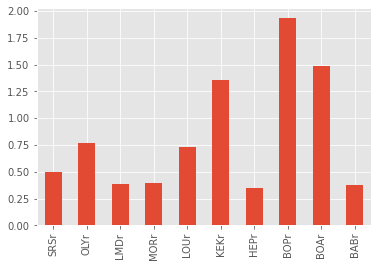

In [47]:
df.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(250)).plot(kind='bar')
plt.show()

In [29]:
# Yearly returns for individual companies
ind_er = df.resample('Y').last().pct_change().mean()
ind_er

SRSr    0.043803
OLYr    0.229301
LMDr    0.135363
MORr    0.097676
LOUr    0.032489
KEKr    0.375545
HEPr    0.112162
BOPr    9.774601
BOAr    0.282015
BABr    0.107954
dtype: float64

In [ ]:
# Portfolio returns
w = [ 0.0, 0.0, 0.30708, 0.0, 0.0,  0.0, 0.0, 0.45966,  0.23326,  0.0]
port_er = (w*ind_er).sum()
port_er

4.600342935543409

In [ ]:
#Plotting the efficient frontier

In [30]:


# Volatility is given by the annual standard deviation. We multiply by 250 because there are 250 trading days/year.
ann_sd = df.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(250))
ann_sd

SRSr    0.498657
OLYr    0.768006
LMDr    0.384094
MORr    0.399091
LOUr    0.730037
KEKr    1.357519
HEPr    0.350020
BOPr    1.930739
BOAr    1.483927
BABr    0.375485
dtype: float64

# Creating a table for visualising returns and volatility of assets

In [31]:
assets = pd.concat([ind_er, ann_sd], axis=1) 
assets.columns = ['Returns', 'Volatility']
assets

,Returns,Volatility
SRSr,0.043803,0.498657
OLYr,0.229301,0.768006
LMDr,0.135363,0.384094
MORr,0.097676,0.399091
LOUr,0.032489,0.730037
KEKr,0.375545,1.357519
HEPr,0.112162,0.350020
BOPr,9.774601,1.930739
BOAr,0.282015,1.483927
BABr,0.107954,0.375485


#Random weights of portfolio

In [32]:
p_ret = [] # Define an empty array for portfolio returns
p_vol = [] # Define an empty array for portfolio volatility
p_weights = [] # Define an empty array for asset weights

num_assets = len(df.columns)
num_portfolios = 10000

In [33]:
for portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights = weights/np.sum(weights)
    p_weights.append(weights)
    returns = np.dot(weights, ind_er) # Returns are the product of individual expected returns of asset and its 
                                      # weights 
    p_ret.append(returns)
    var = cov_matrix.mul(weights, axis=0).mul(weights, axis=1).sum().sum()# Portfolio Variance
    sd = np.sqrt(var) # Daily standard deviation
    ann_sd = sd*np.sqrt(250) # Annual standard deviation = volatility
    p_vol.append(ann_sd)

In [34]:
data = {'Returns':p_ret, 'Volatility':p_vol}

for counter, symbol in enumerate(df.columns.tolist()):
    #print(counter, symbol)
    data[symbol+' weight'] = [w[counter] for w in p_weights]

#Create 10000 portfolios combinations

In [36]:
portfolios  = pd.DataFrame(data)
portfolios.head()

,Returns,Volatility,SRSr weight,OLYr weight,LMDr weight,MORr weight,LOUr weight,KEKr weight,HEPr weight,BOPr weight,BOAr weight,BABr weight
0,1.054061,0.363899,0.086265,0.047180,0.148712,0.160787,0.062806,0.133054,0.149790,0.092267,0.115404,0.003736
1,1.050367,0.349339,0.028282,0.042697,0.085845,0.106543,0.220345,0.053927,0.211642,0.094961,0.121441,0.034317
2,0.679406,0.387483,0.053507,0.088307,0.046501,0.169797,0.125869,0.156070,0.140297,0.052053,0.164337,0.003261
3,0.303632,0.493085,0.055567,0.053106,0.035249,0.135837,0.215231,0.256670,0.018223,0.011015,0.196681,0.022420
4,0.338313,0.280712,0.085061,0.160022,0.023291,0.196132,0.120461,0.079099,0.108295,0.020174,0.058792,0.148674


#Plot the Efficient Frontier

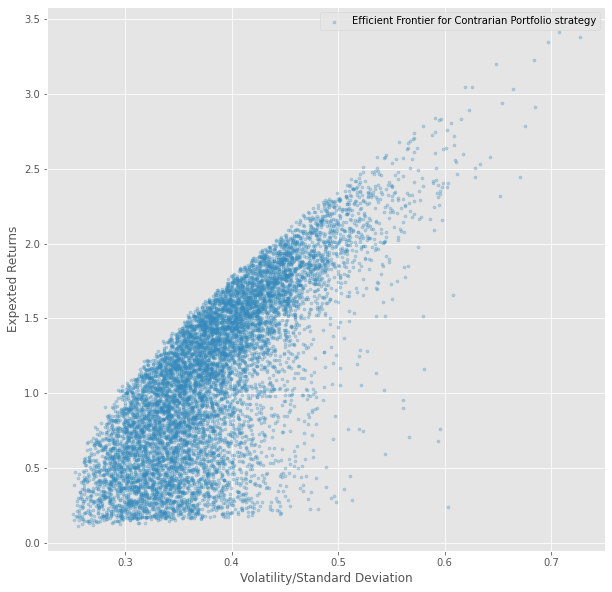

In [37]:
# Plot efficient frontier
portfolios.plot.scatter(x='Volatility', y='Returns', marker='o', s=10, alpha=0.3, grid=True, figsize=[10,10],label= 'Efficient Frontier for Contrarian Portfolio strategy')
plt.xlabel('Volatility/Standard Deviation')
plt.ylabel('Expexted Returns')
plt.show()

#Calculating and Plotting minimum - maximum and optimal portfolio for certain rf



In [39]:
min_vol_port = portfolios.iloc[portfolios['Volatility'].idxmin()]
# idxmin() gives us the minimum value in the column specified.                               
min_vol_port

Returns        0.199333
Volatility     0.250690
SRSr weight    0.081197
OLYr weight    0.085322
LMDr weight    0.075531
MORr weight    0.093019
LOUr weight    0.133714
KEKr weight    0.035795
HEPr weight    0.233095
BOPr weight    0.007791
BOAr weight    0.053656
BABr weight    0.200879
Name: 1141, dtype: float64

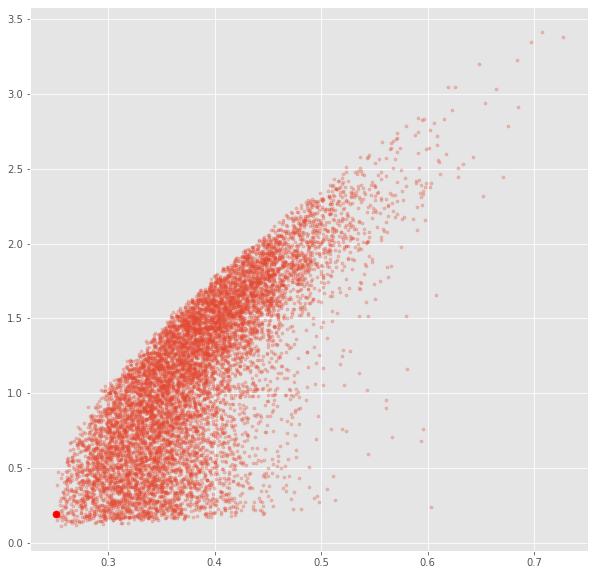

In [40]:
#The minimum volatility is in a portfolio where the weights of (SRS, OLY, MRF,....)are (20%, 3%, 3%,.....)respectively. 
#This point can be plotted on the efficient frontier graph as shown:
# plotting the minimum volatility portfolio
plt.subplots(figsize=[10,10])
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='o', s=50)


In [41]:
#Putting the maximun oirtfolio
max_vol_port = portfolios.iloc[portfolios['Volatility'].idxmax()]
# idxmax() gives us the maximum value in the column specified.                               
max_vol_port

Returns        3.376232
Volatility     0.727099
SRSr weight    0.012560
OLYr weight    0.256990
LMDr weight    0.008612
MORr weight    0.051671
LOUr weight    0.004900
KEKr weight    0.140820
HEPr weight    0.067605
BOPr weight    0.328934
BOAr weight    0.120121
BABr weight    0.007788
Name: 8677, dtype: float64

In [42]:
# Finding the optimal portfolio
rf = 0.01 # risk factor
optimal_risky_port = portfolios.iloc[((portfolios['Returns']-rf)/portfolios['Volatility']).idxmax()]
optimal_risky_port

Returns        3.198237
Volatility     0.648232
SRSr weight    0.105563
OLYr weight    0.019169
LMDr weight    0.027688
MORr weight    0.037761
LOUr weight    0.033839
KEKr weight    0.062966
HEPr weight    0.210251
BOPr weight    0.318493
BOAr weight    0.002407
BABr weight    0.181864
Name: 8066, dtype: float64

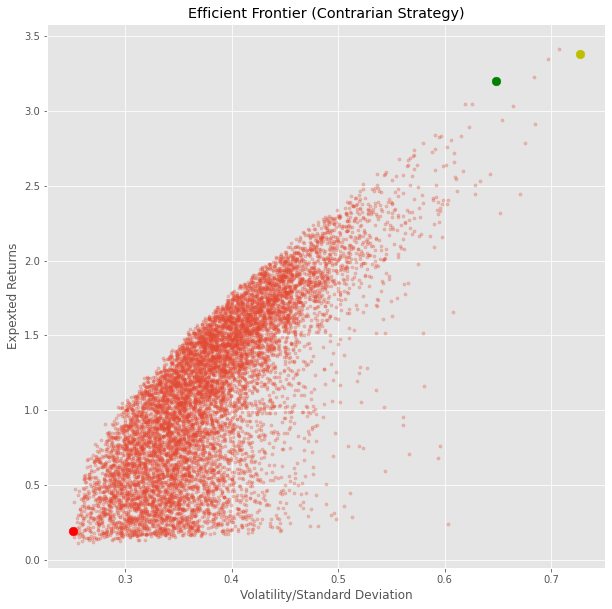

In [43]:
# Plotting optimal portfolio
# The green star represents the optimal risky portfolio.#The red star the minimum and the yellow the maximum

plt.subplots(figsize=(10, 10))
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='.', s=300)
plt.scatter(optimal_risky_port[1], optimal_risky_port[0], color='g', marker='.', s=300)
plt.scatter(max_vol_port[1], max_vol_port[0], color='y', marker='.', s=300)
plt.title(label= 'Efficient Frontier (Contrarian Strategy)')
plt.xlabel('Volatility/Standard Deviation')
plt.ylabel('Expexted Returns')
plt.savefig('Efficient Frontier Contrarian Strategy.png')

In [ ]:
min_vol_port.to_excel('minimum.xlsx')
max_vol_port.to_excel('maximum.xlsx')
optimal_risky_port.to_excel('optimal.xlsx')
  